In [1]:
from mlp import MultilayerPerceptron, CrossEntropy, Softmax, Layer, LeakyRelu, Relu, Sigmoid
import numpy as np
import struct
from array import array

In [2]:
#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (np.array(x_train), np.array(y_train)),(np.array(x_test), np.array(y_test))        

 

In [3]:
 loss = CrossEntropy()
 model = MultilayerPerceptron([
            Layer(fan_in=28*28,  fan_out=64,       activation_function=  Relu()),
            Layer(fan_in=64,    fan_out=87,       activation_function= Relu()), 
            Layer(fan_in=87,    fan_out=72,       activation_function= LeakyRelu()), 
            Layer(fan_in=72,     fan_out=10,       activation_function= Softmax()), 
 ])
  

weights shape (784, 64)
bias shape (64,)
weights shape (64, 87)
bias shape (87,)
weights shape (87, 72)
bias shape (72,)
weights shape (72, 10)
bias shape (10,)


In [4]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1
    for x in zip(images, title_texts):
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize=15)
        index += 1
    plt.show()

In [5]:
    mnist_dataloader = MnistDataloader(
                training_images_filepath="data/train-images.idx3-ubyte",
                training_labels_filepath="./data/train-labels.idx1-ubyte",
                test_images_filepath="./data/t10k-images.idx3-ubyte",
                test_labels_filepath="./data/t10k-labels.idx1-ubyte",
    )
    (train_x, train_y), (test_x, test_y) = mnist_dataloader.load_data()

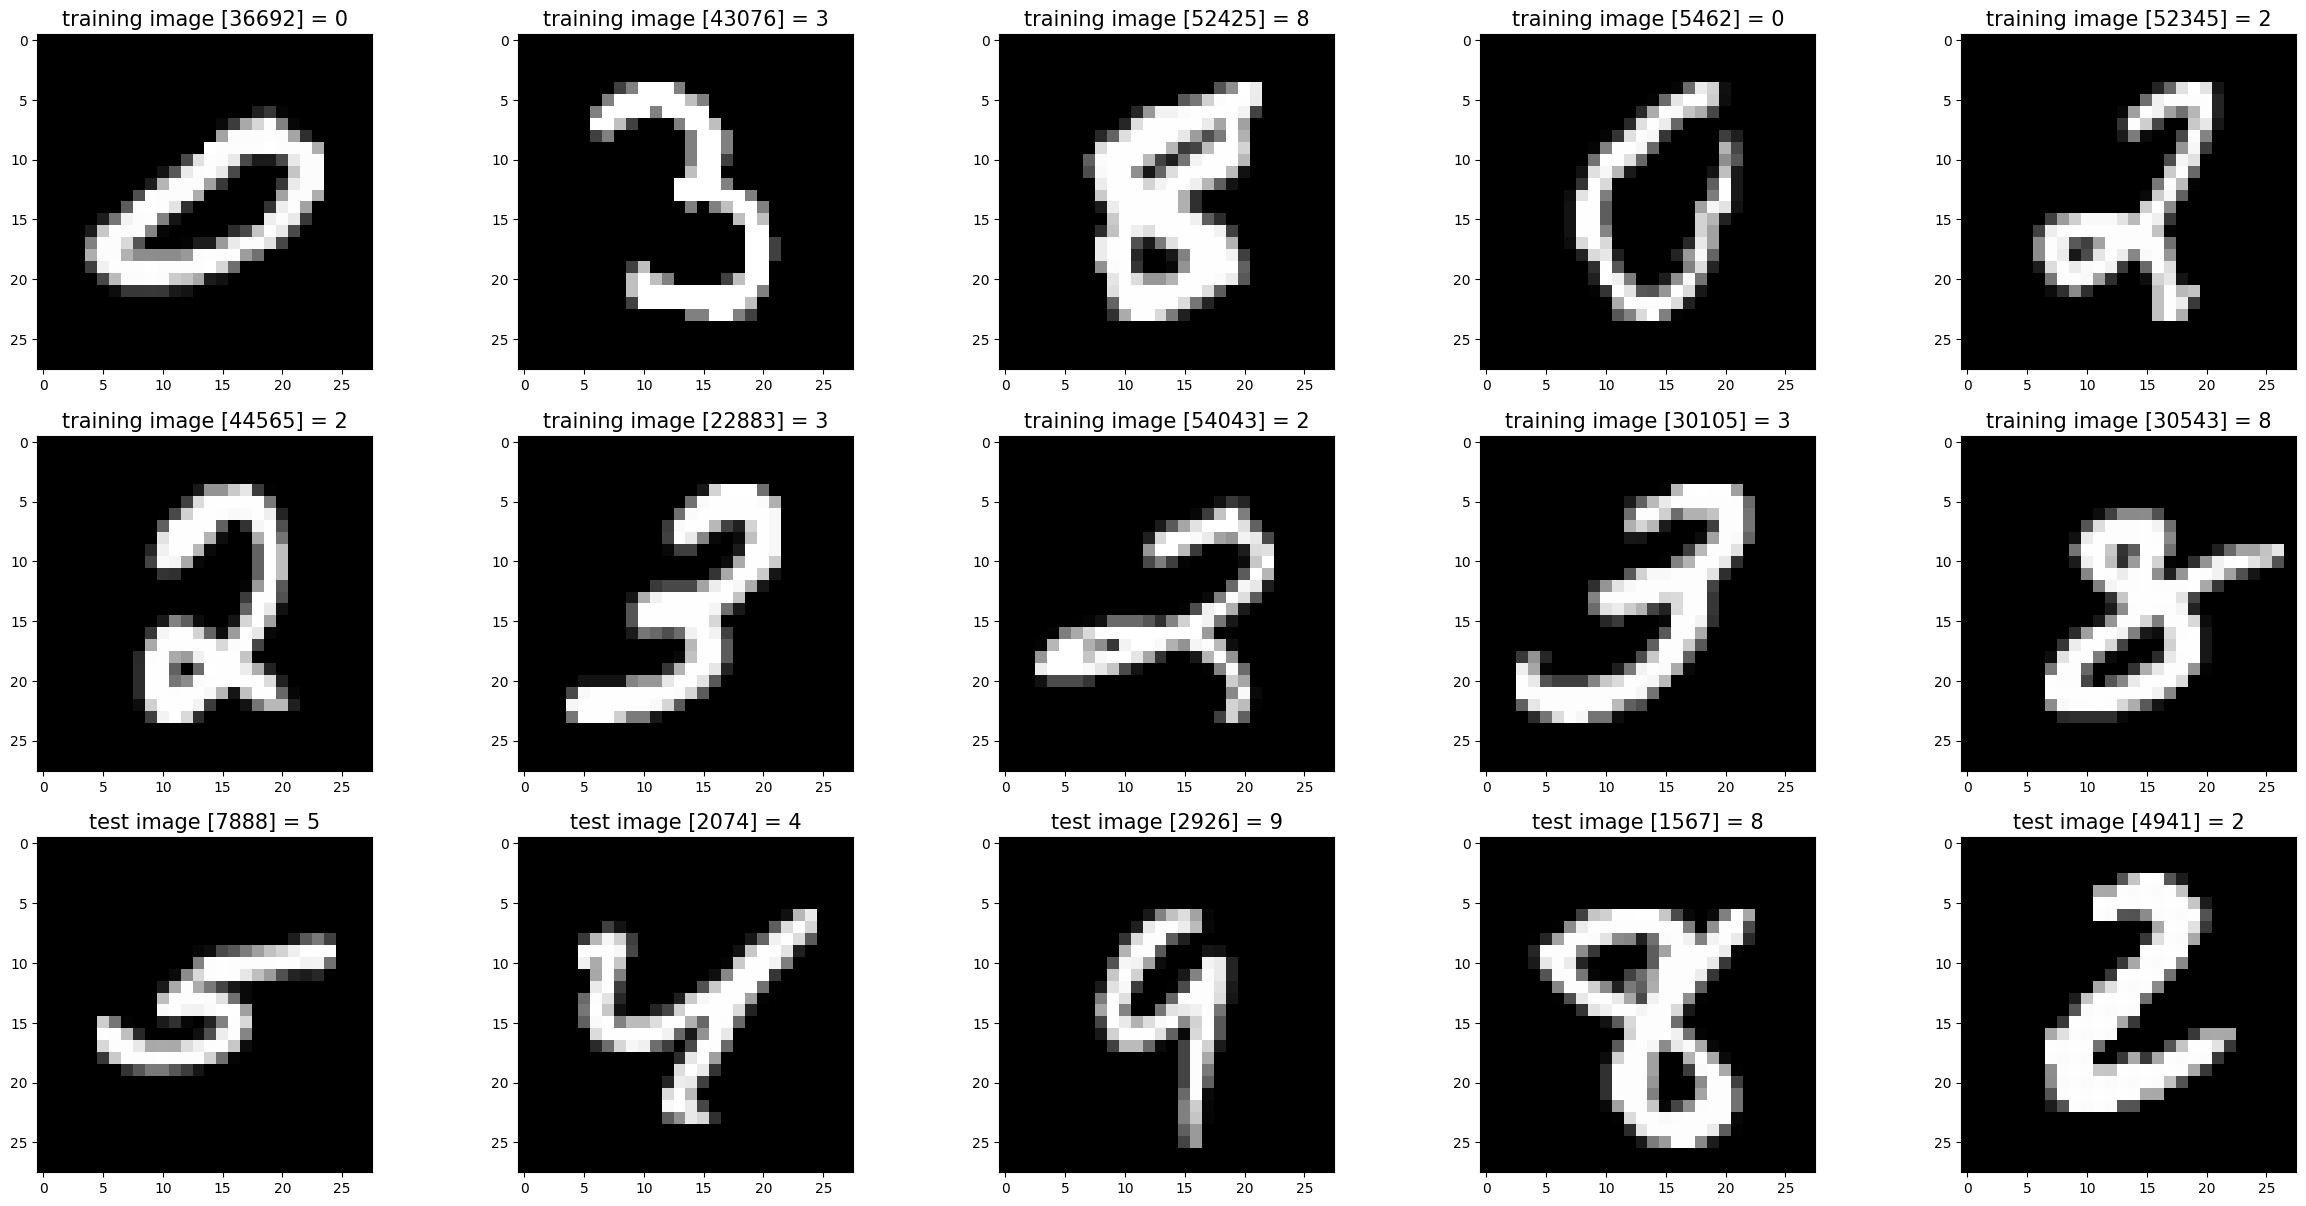

In [6]:
import random
import matplotlib.pyplot as plt

images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(train_x[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(train_y[r]))

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(test_x[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(test_y[r]))

show_images(images_2_show, titles_2_show)

In [7]:
train_x = train_x.reshape(train_x.shape[0], 784)
test_x =  test_x.reshape(test_x.shape[0], 784)
x_mean = np.mean(train_x)
x_std = np.std(test_x)

train_x = (train_x - x_mean) / x_std 
test_x = (test_x - x_mean)  /  x_std

train_y = np.eye(10)[train_y]
test_y = np.eye(10)[test_y]

train_data = np.array(list(zip(train_x, train_y)), dtype=object)  # Convert to NumPy array

In [8]:
# Shuffle the data to ensure randomness
np.random.shuffle(train_data)

# Calculate the split index
split_idx = int(0.8 * len(train_data))  # 80% for training, 20% for validation

# Split the data
train_split = train_data[:split_idx]  # First 80% for training
val_split = train_data[split_idx:]    # Remaining 20% for validation

# Separate features (images) and labels
train_x_split = np.array([item[0] for item in train_split])
train_y_split = np.array([item[1] for item in train_split])
val_x_split = np.array([item[0] for item in val_split])
val_y_split = np.array([item[1] for item in val_split])


training_losses, validation_losses = model.train( 
      train_x=train_x_split,
      train_y=train_y_split,
      val_x=val_x_split,
      val_y=val_y_split,
      loss_func=loss,
      learning_rate=1E-3,
      batch_size=20,
      epochs=20
)

Epoch :: 1 :: Train Loss= 0.31012370506480885 :: Val Loss 0.20535816389049272
Epoch :: 2 :: Train Loss= 0.16534689261744306 :: Val Loss 0.18122917059676716
Epoch :: 3 :: Train Loss= 0.15044387832994238 :: Val Loss 0.1688930710310537
Epoch :: 4 :: Train Loss= 0.14075392544413956 :: Val Loss 0.164930978171959
Epoch :: 5 :: Train Loss= 0.13505971131660444 :: Val Loss 0.15734276345810164
Epoch :: 6 :: Train Loss= 0.12907203746257623 :: Val Loss 0.14999931158629734
Epoch :: 7 :: Train Loss= 0.12586304778395635 :: Val Loss 0.148904422307084
Epoch :: 8 :: Train Loss= 0.12269024615433863 :: Val Loss 0.14210721651397762
Epoch :: 9 :: Train Loss= 0.12258984049545255 :: Val Loss 0.14491528235105197
Epoch :: 10 :: Train Loss= 0.12063459184195997 :: Val Loss 0.1407302220783881
Epoch :: 11 :: Train Loss= 0.11957190617210159 :: Val Loss 0.14468629208840028
Epoch :: 12 :: Train Loss= 0.11851818731181533 :: Val Loss 0.14310098963429246
Epoch :: 13 :: Train Loss= 0.11939941313152311 :: Val Loss 0.139677

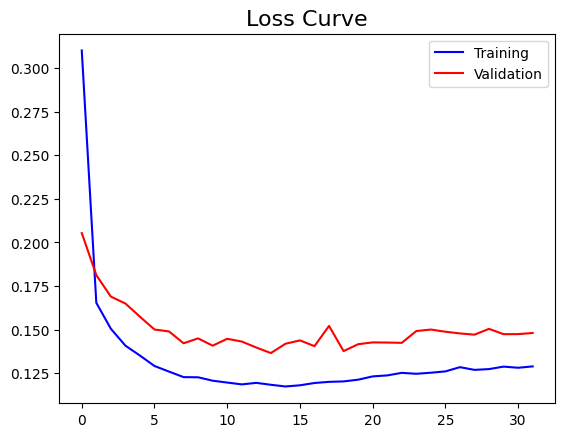

In [9]:
import matplotlib.pyplot as plt

plt.plot(training_losses, color='b', label='Training')
plt.plot(validation_losses, color='r', label="Validation")
plt.title("Loss Curve", size=16)
plt.legend()

In [10]:
predicted_labels  = np.argmax(model.forward(test_x), axis=1)
true_labels  = np.argmax(test_y, axis=1)
test_accuracy = np.mean(predicted_labels == true_labels)

In [11]:
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")

Final Test Accuracy: 93.35%


In [12]:
decoded = list(enumerate(np.argmax(test_y, axis=1)))

indices = []
found = set()

for i, el in decoded:
    if len(indices) == 10:
        break
    if el not in found:
        indices.append(i)
        found.add(el)
        
# Extract one example of each digit
selected_images = test_x[indices]
selected_labels = test_y[indices]
        
for img, lbl in zip(selected_images, selected_labels):
    print("Predicted:", np.argmax(model.forward(img)), "true:", np.argmax(lbl))


Predicted: 7 true: 7
Predicted: 2 true: 2
Predicted: 1 true: 1
Predicted: 0 true: 0
Predicted: 4 true: 4
Predicted: 9 true: 9
Predicted: 6 true: 5
Predicted: 6 true: 6
Predicted: 3 true: 3
Predicted: 8 true: 8
